In [28]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [29]:
import matplotlib as mpl

import matplotlib.pyplot as plt

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 데이터 수집 및 정제

In [30]:
import os
import pandas as pd

os.getcwd()

'/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초'

In [31]:
os.chdir('/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초')

In [32]:
df = pd.read_csv("FITNESS_정제.csv", encoding = 'euc-kr')
df.head(5)

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,NaN,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [33]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Malgun Gothic' in f.name]

[]

In [34]:
# 125 Page
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [35]:
# 126 Page
df_raw = pd.read_csv("FITNESS_정제.csv", encoding = 'euc-kr')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,NaN,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [36]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    30 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    29 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     object 
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
 10  BIRTH     31 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.8+ KB


In [37]:
# 결측치 확인 : pandas.DataFrame.isnull() 또는 pandas.DataFrame.isna()
df_raw.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False


In [38]:
df_raw.isna().head() 

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False


In [39]:
# 결측치(True) 현황 요약 :sum 함수
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
BIRTH       0
dtype: int64

In [40]:
df_raw[df_raw.isnull().sum(axis=1)>0]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
1,Gracie,NaN,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09
18,Ralph,남성,43,40대,NaN,49.091,10.85 SEC,162,64,170,1979-09-23


In [41]:
df_raw['GENDER'].fillna('여성',inplace=True)
df_raw.isnull().sum()
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [42]:
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.426923
여성    72.908750
Name: WEIGHT, dtype: float64

In [43]:
df_raw["WEIGHT"] = df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.150,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.870,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.840,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.870,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,82.427,49.156,8.95 SEC,180,44,185,1977-02-09


In [44]:
df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean"),inplace=True)
df_raw.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
BIRTH       0
dtype: int64

In [45]:
df_raw["RUNTIME"]

0      8.17 SEC
1      8.63 SEC
2      8.65 SEC
3      8.92 SEC
4      8.95 SEC
5      9.22 SEC
6       9.4 SEC
7      9.63 SEC
8      9.93 SEC
9        10 SEC
10    10.07 SEC
11    10.08 SEC
12    10.13 SEC
13    10.25 SEC
14    10.33 SEC
15    10.47 SEC
16     10.5 SEC
17     10.6 SEC
18    10.85 SEC
19    10.95 SEC
20    11.08 SEC
21    11.12 SEC
22    11.17 SEC
23    11.37 SEC
24     11.5 SEC
25    11.63 SEC
26    11.95 SEC
27    12.63 SEC
28    12.88 SEC
29    13.08 SEC
30    14.03 SEC
Name: RUNTIME, dtype: object

In [46]:
# 단위와 같이 표현되어 있는 수치형 변수 처리
df_raw[['RUNTIME', 'RUNTIME_UNIT']] = df_raw['RUNTIME'].str.split(' ', expand = True)
df_raw['RUNTIME'] = df_raw['RUNTIME'].astype('float64')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC


<Axes: >

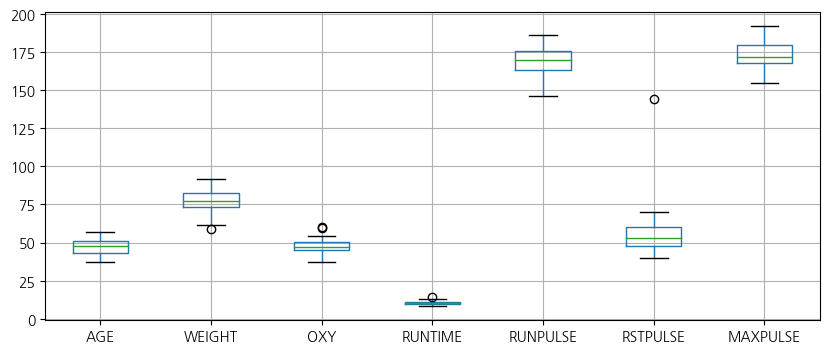

In [47]:
df_raw.boxplot(figsize = (10, 4))

In [48]:
df_raw["RSTPULSE"] >= 100
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176,1968-05-02,SEC
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176,1976-12-04,SEC


In [49]:
df_raw [(df_raw["RSTPULSE"] >= 100) ]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC


In [50]:
# RSTPULSE 변수에서 이상치 제외(100 이하)
df_fitness = df_raw[df_raw["RSTPULSE"] < 100]
df_fitness 

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [51]:
df_fitness.reset_index(drop = True, inplace=True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [52]:
df_fitness.info()
df_fitness.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          30 non-null     object 
 1   GENDER        30 non-null     object 
 2   AGE           30 non-null     int64  
 3   AGEGROUP      30 non-null     object 
 4   WEIGHT        30 non-null     float64
 5   OXY           30 non-null     float64
 6   RUNTIME       30 non-null     float64
 7   RUNPULSE      30 non-null     int64  
 8   RSTPULSE      30 non-null     int64  
 9   MAXPULSE      30 non-null     int64  
 10  BIRTH         30 non-null     object 
 11  RUNTIME_UNIT  30 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.9+ KB


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC


In [53]:
# 일자 변환 및 파생변수 생성
df_fitness['BIRTH'] = pd.to_datetime(df_fitness['BIRTH'], format = '%Y-%m-%d')
df_fitness['YEAR'] = df_fitness['BIRTH'].dt.year
df_fitness['MONTH'] = df_fitness['BIRTH'].dt.month
df_fitness['DAY'] = df_fitness['BIRTH'].dt.day
df_fitness['WEEKDAY'] = df_fitness['BIRTH'].dt.weekday
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT,YEAR,MONTH,DAY,WEEKDAY
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC,1976,4,5,0
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC,1986,9,6,5
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC,1978,4,7,4
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC,1966,8,8,0
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC,1977,2,9,2


In [54]:
# 분석에 필요하지 않은 변수 제외
df_fitness = df_fitness.drop(['NAME', 'BIRTH', 'RUNTIME_UNIT'], axis = 1)
df_fitness.head()

,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY
0,여성,42,40대,68.150,59.571,8.17,166,40,172,1976,4,5,0
1,여성,38,30대,81.870,60.055,8.63,170,48,186,1986,9,6,5
2,여성,43,40대,85.840,54.297,8.65,156,45,168,1978,4,7,4
3,여성,50,50대,70.870,54.625,8.92,146,48,155,1966,8,8,0
4,남성,49,40대,82.427,49.156,8.95,180,44,185,1977,2,9,2


In [55]:
# 범주형 변수의 Dummy 변수화
df_fitness_dummy = pd.get_dummies(df_fitness, drop_first = True)
df_fitness_dummy.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,42,68.150,59.571,8.17,166,40,172,1976,4,5,0,1,1,0
1,38,81.870,60.055,8.63,170,48,186,1986,9,6,5,1,0,0
2,43,85.840,54.297,8.65,156,45,168,1978,4,7,4,1,1,0
3,50,70.870,54.625,8.92,146,48,155,1966,8,8,0,1,0,1
4,49,82.427,49.156,8.95,180,44,185,1977,2,9,2,0,1,0


In [56]:
# 137 Page
# scale변환: 평균,표준편차 기준
df_scale_std = StandardScaler()
df_scale_std = df_scale_std. fit_transform(df_fitness_dummy)  
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_dummy.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.805985,-1.119366,2.334717,-1.771826,-0.361066,-1.856653,-0.200185,-0.008206,-0.814663,-1.233538,-1.415684,0.935414,1.069045,-0.707107
1,-1.506841,0.607422,2.429494,-1.423469,0.029276,-0.777726,1.328503,1.222750,0.606261,-1.116799,1.082582,0.935414,-0.935414,-0.707107
2,-0.630771,1.107082,1.301962,-1.408323,-1.336919,-1.182324,-0.636953,0.237985,-0.814663,-1.000061,0.582929,0.935414,1.069045,-0.707107
3,0.595728,-0.777029,1.366191,-1.203852,-2.312773,-0.777726,-2.056450,-1.239163,0.322076,-0.883322,-1.415684,0.935414,-0.935414,1.414214
4,0.420514,0.677525,0.295251,-1.181133,1.005129,-1.317190,1.219311,0.114889,-1.383032,-0.766583,-0.416378,-1.069045,1.069045,-0.707107


In [57]:
# scale 변환 결과 확인: 요약통계량 : pandas.DataFrame.describe()df_scale_desc = df_scale_std.describe()
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056,-1.608,-1.667,-1.700,-1.416,-1.069,-0.935,-0.707
25%,-0.631,-0.494,-0.486,-0.609,-0.703,-0.778,-0.637,-0.808,-0.815,-0.854,-0.916,-1.069,-0.935,-0.707
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200,-0.008,-0.388,-0.008,-0.416,0.935,-0.935,-0.707
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673,0.361,1.033,0.839,1.083,0.935,1.069,1.414
max,1.822,1.836,2.429,2.666,1.591,2.189,1.984,1.838,1.459,1.685,1.582,0.935,1.069,1.414


In [58]:
# scale변환: 최소, 최대값 기준
df_scale_minmax= MinMaxScaler().fit_transform(df_fitness_dummy) 
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_dummy.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459,0.464286,0.272727,0.137931,0.000000,1.0,1.0,0.0
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838,0.821429,0.727273,0.172414,0.833333,1.0,0.0,0.0
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351,0.535714,0.272727,0.206897,0.666667,1.0,1.0,0.0
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000,0.107143,0.636364,0.241379,0.000000,1.0,0.0,1.0
4,0.60,0.717266,0.519169,0.133106,0.85,0.133333,0.810811,0.500000,0.090909,0.275862,0.333333,0.0,1.0,0.0


In [59]:
# scale 변환 결과 확인: 요약통계량 : pandas.DataFrame.describe()
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509,0.467,0.533,0.502,0.472,0.533,0.467,0.333
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252,0.295,0.325,0.300,0.339,0.507,0.507,0.479
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351,0.232,0.273,0.250,0.167,0.000,0.000,0.000
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459,0.464,0.409,0.500,0.333,1.000,0.000,0.000
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676,0.571,0.864,0.750,0.833,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [60]:
# scale변환: 로버스트 기준
df_scale_robust = RobustScaler().fit_transform(df_fitness_dummy) 
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_dummy.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.6875,-0.938037,2.463797,-1.535284,-0.296296,-1.162791,0.000000,0.000000,-0.230769,-0.724138,-0.50,0.0,1.0,0.0
1,-1.1875,0.535331,2.558834,-1.218589,0.000000,-0.418605,1.166667,1.052632,0.538462,-0.655172,0.75,0.0,0.0,0.0
2,-0.5625,0.961662,1.428207,-1.204819,-1.037037,-0.697674,-0.333333,0.210526,-0.230769,-0.586207,0.50,0.0,1.0,0.0
3,0.3125,-0.645941,1.492612,-1.018933,-1.777778,-0.418605,-1.416667,-1.052632,0.384615,-0.517241,-0.50,0.0,0.0,1.0
4,0.1875,0.595146,0.418733,-0.998279,0.740741,-0.790698,1.083333,0.105263,-0.538462,-0.448276,0.00,-1.0,1.0,0.0


In [61]:
# scale 변환 결과 확인: 요약통계량 : pandas.DataFrame.describe()
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153,0.007,0.210,0.005,0.208,-0.467,0.467,0.333
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776,0.870,0.551,0.601,0.509,0.507,0.507,0.479
min,-1.312,-1.912,-1.892,-1.535,-1.778,-1.163,-1.417,-1.368,-0.692,-1.000,-0.500,-1.000,0.000,0.000
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333,-0.684,-0.231,-0.500,-0.250,-1.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667,0.316,0.769,0.500,0.750,0.000,1.000,1.000
max,1.188,1.583,2.559,2.499,1.185,1.628,1.667,1.579,1.000,1.000,1.000,0.000,1.000,1.000


In [62]:
# 140 Page
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_dummy["RSTPULSE"]  
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [63]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<Axes: title={'center': 'Raw'}>,
        <Axes: title={'center': 'Standard'}>],
       [<Axes: title={'center': 'MinMax'}>,
        <Axes: title={'center': 'Robust'}>]], dtype=object)

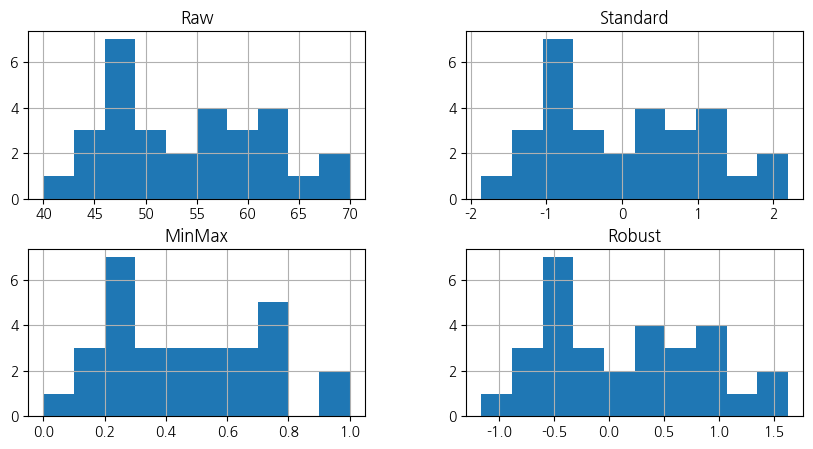

In [64]:
# pandas의 DataFrame.hist 이용(figsize = (x축 크기, y축 크기)
df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize = (10,5))